In [1]:
import os
import sys

import matplotlib.pyplot as plt

os.chdir('..')

import numpy as np
import torch
import pandas as pd
from models.TrainPlanningOperator2D import PlanningOperator2D
from heuristics import generaterandompos
from heuristics import euclideannorm, FMM, dijkstra, planningoperator, highresFMM, scikitFMM
from heuristics import testheuristiconmaps, testheuristiconsinglemap
from matplotlib.patches import Patch


In [2]:
i = 2
j = 0
maps_512x512 = np.load('dataset/street_maps_512.npy')
maps_1024x1024 = np.load('dataset/street_maps_1024.npy')

mapx = 1-maps_512x512[i,:,:].reshape(1,512,512)
mapx_hres = 1-maps_1024x1024[j,:,:].reshape(1,1024,1024)

goalx = generaterandompos(mapx)

map = 1-np.squeeze(mapx,axis=0)
highresmap = 1-np.squeeze(mapx_hres,axis=0)
goal = np.squeeze(goalx,axis=0)




In [3]:
# map = np.ones((512,512),dtype=int)
# highresmap = np.ones((1024,1024),dtype=int)

value_fmm,t_fmm = FMM(map,goal)
value_high_res_fmm,t_res_fmm= highresFMM(highresmap,goal)
value_scifmm,t_scifmm = scikitFMM(map,goal)
value_dijkstra,t_dijkstra = dijkstra(map,goal)

value_eucldn,t_eucl = euclideannorm(map,goal)

value_dijkstra = np.where(value_dijkstra>10e6, 0, value_dijkstra)

fmm_error = ((value_fmm-value_dijkstra))
fmm_error = np.where(map==1,0,fmm_error)
fmm_error = np.where(np.isinf(fmm_error),0,fmm_error)

highres_fmm_error = ((value_high_res_fmm-value_dijkstra))
highres_fmm_error = np.where(highresmap[1::2,1::2]==1,0,highres_fmm_error)
highres_fmm_error = np.where(highres_fmm_error>10e2,0,highres_fmm_error)

scifmm_error = ((value_scifmm-value_dijkstra))
scifmm_error = np.where(map==1,0,scifmm_error)
scifmm_error = np.where(np.isinf(scifmm_error),0,scifmm_error)

# dijkstra_error = ((value_dijkstra-value_eucldn))
# dijkstra_error = np.where(map==1,0,dijkstra_error)
# dijkstra_error = np.where(np.isinf(dijkstra_error),0,dijkstra_error)

print("PyFMM took:",t_fmm,
      "\nHigh Res PyFMM took:",t_res_fmm,
      "\nScikit FMM took:",t_scifmm,
      "\nDijkstra took:",t_dijkstra)


PyFMM took: 0.07139921188354492 
High Res PyFMM took: 0.3871021270751953 
Scikit FMM took: 0.04926013946533203 
Dijkstra took: 7.326696395874023


Mean Error: -8.904996472417123


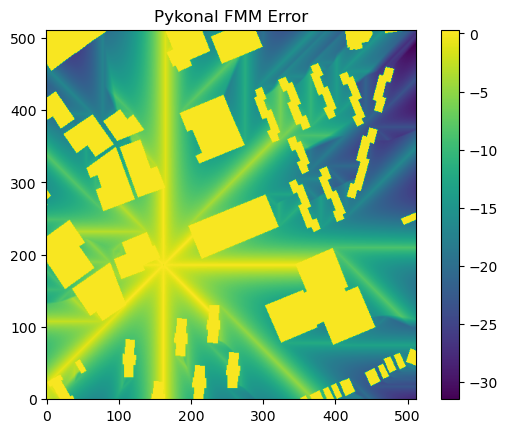

In [4]:
plt.imshow(fmm_error,origin='lower')
plt.title("Pykonal FMM Error")
plt.colorbar()
print("Mean Error:",np.mean(fmm_error))

Mean Error: -7.482767813477173


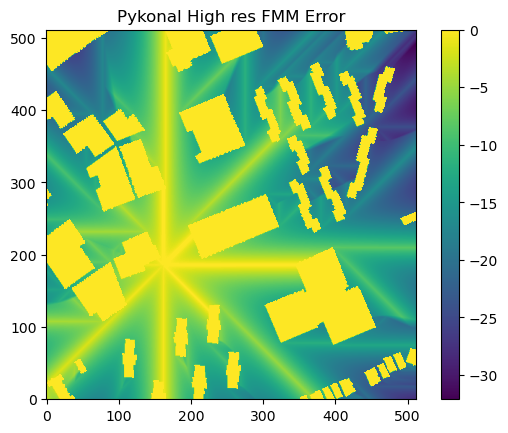

In [7]:
plt.imshow(highres_fmm_error,origin='lower',vmax=0)
plt.title("Pykonal High res FMM Error")
plt.colorbar()
print("Mean Error:",np.mean(highres_fmm_error))

Mean Error: -8.905001105853284


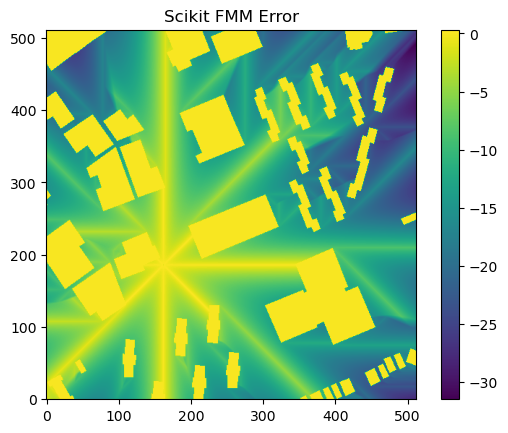

In [8]:
plt.imshow(scifmm_error,origin='lower')
plt.title("Scikit FMM Error")
plt.colorbar()
print("Mean Error:",np.mean(scifmm_error))